Text(0.5, 0, 'Ratio Axolotl/Human')

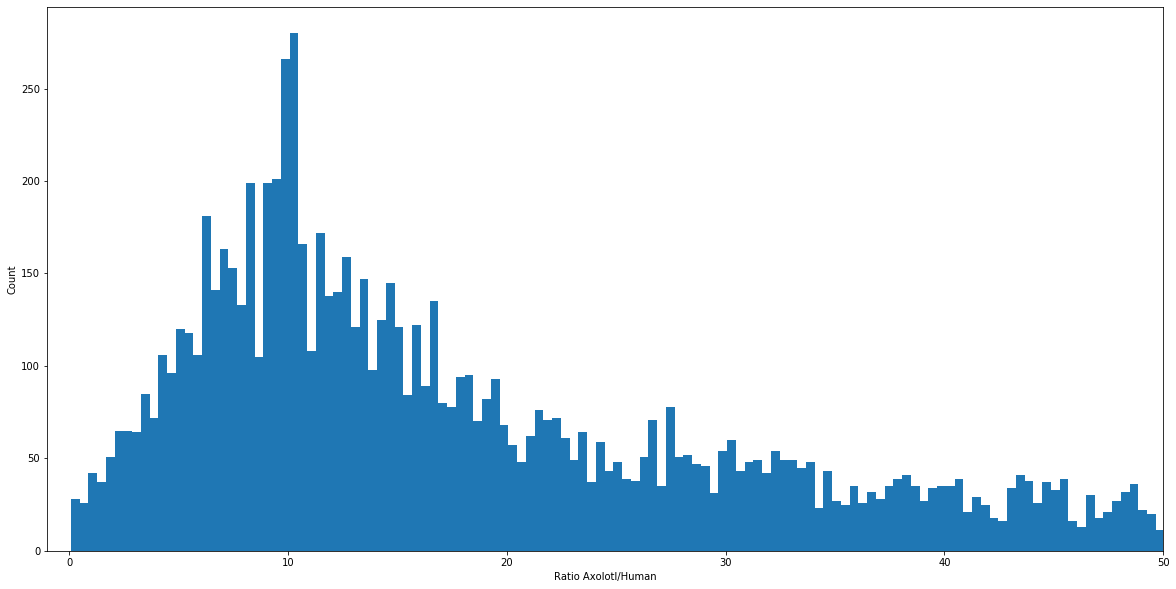

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import math
#import sqlite3


#conn = sqlite3.connect(':memory:')
#c = conn.cursor()
#c.execute("CREATE TABLE TADS()")


tadSizes = dict()
with open('/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/compare_TADs/matches', 'r') as hFile:
    for strLine in hFile.readlines():
        arrCols = strLine.rstrip().split('\t')
        strGeneSymbol = arrCols[0]
        sizes = tadSizes.get(strGeneSymbol)
        if(sizes):
            n = sizes.get('hs')
            if not n or n < int(arrCols[4]):
                sizes['hs'] = int(arrCols[4])
            n = sizes.get('am')
            if not n or n < int(arrCols[8]):
                sizes['am'] = int(arrCols[8])
        else:
            tadSizes[strGeneSymbol] = {'hs': int(arrCols[4]), 'am': int(arrCols[8])}

hs_vals = []
am_vals = []
ratios = []
for genesymbol in tadSizes:
    sizes = tadSizes.get(genesymbol)
    #hs_vals.append(math.log10(sizes['hs']))
    #am_vals.append(math.log10(sizes['am']))
    hs_vals.append(sizes['hs'])
    am_vals.append(sizes['am'] / sizes['hs'])
    ratios.append(sizes['am'] / sizes['hs'])
plt.figure(figsize=(20,10))
plt.hist(ratios, bins=1000)
plt.xlim([-1, 50])
plt.ylabel('Count')
plt.xlabel('Ratio Axolotl/Human')
#plt.scatter(hs_vals, am_vals)
#plt.scatter(hs_vals, am_vals)
#bestfit = np.polyfit(hs_vals, am_vals, 1, rcond=None, full=False, w=None, cov=False)
#print(bestfit)
#y_fit = []
#for x in hs_vals:
#    y_fit.append(bestfit[0] * x + bestfit[1])
#plt.plot(hs_vals, y_fit, 'r-')